In [1]:
import numpy as np 
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, callbacks

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

## Data Labels

+ Age : Age of the patient

+ Sex : Sex of the patient

+ exang: exercise induced angina (1 = yes; 0 = no)

+ ca: number of major vessels (0-3)

+ cp : Chest Pain type chest pain type
    + Value 0: typical angina
    + Value 1: atypical angina
    + Value 2: non-anginal pain
    + Value 3: asymptomatic

+ trtbps : resting blood pressure (in mm Hg)

+ chol : cholestoral in mg/dl fetched via BMI sensor

+ fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

+ rest_ecg : resting electrocardiographic results
    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST  elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

+ thalach : maximum heart rate achieved

+ target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
data.output.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

+ Correlation Heatmap

<AxesSubplot:>

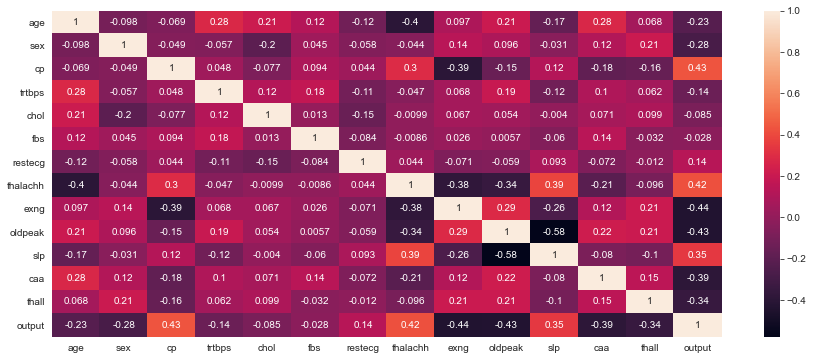

In [7]:
plt.figure(figsize=(15, 6))
sns.set_style('darkgrid')
sns.heatmap(data.corr(), annot=True)

+ Age Distribution

In [18]:
ax = px.histogram(data, x='age', template='plotly_dark', color='output', title='Age Distribution')
ax.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

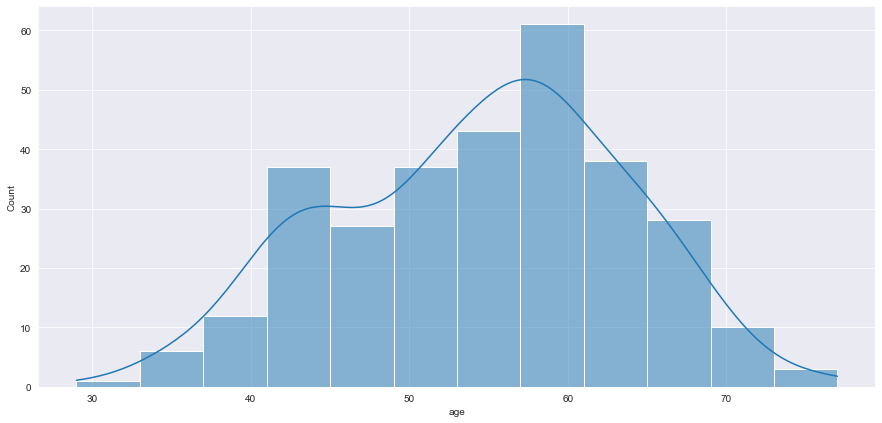

In [16]:
plt.figure(figsize=(15, 7))
sns.histplot(data.age, kde=True)

The Age column has a normal distribution, with most of the patients ranging between 50 and 65 years of age. Also, having a high chance of heart attack.

In [25]:
ax = px.pie(data, names='output', template='plotly_dark', hole=0.5)
ax.show()

From the dataset, about 54% of the patients had a high chance of heart attack.

+ Gender Distribution

In [26]:
ax = px.pie(data, names='sex', template='plotly_dark', hole=0.5)
ax.show()

From the dataset, 68.3% of the patients are of type 1 sex and 31.7% are of type 0

+ Chest Pain Types

In [29]:
ax = px.pie(data, names = 'cp', template = 'plotly_dark', title = 'Chest Pain Types', hole = 0.4)
ax.show()

Majority of the patients 47.2% experience type 0 chest pain : typical angina. Followed by type 1 (28.7%) and type 2 (16.5%). Only about 7% experience type 3 (asymtomatic) chest pains.

+ Chance of Heart Attack based on Chest Pain Type

In [31]:
ax = px.sunburst(data, names = 'cp', path=['output', 'cp'], template = 'plotly_dark', title = 'Chance of Heart Attack based on Chest Pain Type')
ax.show()

Majority of the patients with a high chance heart attack experience type 2 chest pain (atypical_angina). Followed by type 1 and type 0.
On the other hand, most of those with a lower chance of heart attack experience type 0 (typical angina).

+ Correlation between age and resting blood pressure

In [34]:
ax = px.scatter(data, x = 'age', y = 'trtbps', size = 'trtbps', 
                color = 'output',
                template = 'plotly_dark', 
                size_max = 20,
                title = 'Correlation Between Age and Resting BP')
ax.show()

Distirbution of resting bp and age (scatter) with chances of heart attack

<AxesSubplot:xlabel='age', ylabel='trtbps'>

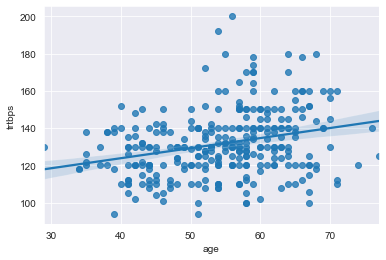

In [35]:
sns.regplot(x = data.age, y = data['trtbps'])

In [ ]:
+ Age

In [ ]:
ax = px.scatter(data, x = 'age', y = 'trtbps', )